<a href="https://colab.research.google.com/github/hemanshudas/SD565_Assignments/blob/main/Hemanshu_SD265_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introductory Machine Learning: Assignment 1

**Deadline:**

Assignment 1 is due Thursday, September 23 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu)).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Linear regression
2. k-nearest-neighbor classification

This assignment will also help you to learn the essentials of Python, Pandas, and Jupyter notebooks. 

## Problem 1: Linear Regression with Covid Data

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this problem we will only use the data aggregated across states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Load the data

First, read the whole dataset including the accumulated cases and deaths for each state for each day.

In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(10)

,date,state,cases,deaths
31134,2021-09-19,Tennessee,1151186,14225
31135,2021-09-19,Texas,3926755,62323
31136,2021-09-19,Utah,491073,2787
31137,2021-09-19,Vermont,31634,298
31138,2021-09-19,Virgin Islands,6439,67
31139,2021-09-19,Virginia,827197,12242
31140,2021-09-19,Washington,623254,7256
31141,2021-09-19,West Virginia,223117,3370
31142,2021-09-19,Wisconsin,772089,8703
31143,2021-09-19,Wyoming,83958,918


### Aggregate data across states

We can merge data from different states to get the total number of cases and deaths for the country. Here we also show an example of visualizing the data.

In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(10)

,cases,deaths
date,,
2021-09-10,40914456,658865
2021-09-11,40988382,659556
2021-09-12,41027940,659854
2021-09-13,41312998,661579
2021-09-14,41465694,664232
2021-09-15,41635803,666816
2021-09-16,41790700,670231
2021-09-17,41956165,672810
2021-09-18,42026148,673637


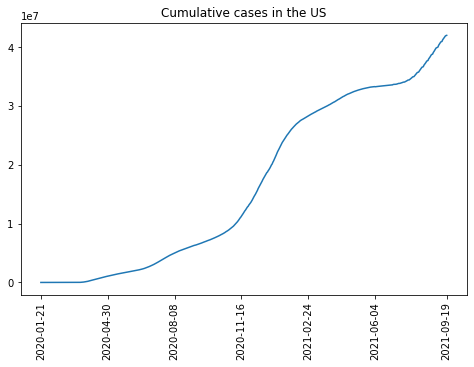

In [4]:
new_cases = np.diff(merged_data['cases'])
dates = np.array(merged_data['cases'].index)
plt.figure(figsize=(8,5))
plt.plot(dates, merged_data['cases'])
plt.xticks(dates[[0, 100, 200, 300, 400, 500, len(dates)-1]], rotation=90)
_ = plt.title('Cumulative cases in the US')

### Problem 1.1

Let's call April 1, 2021 to May 1, 2021 Period 1. The following code extracts the cumulative cases, deaths, and days during this period



In [5]:
first_date = '2021-04-01'
last_date = '2021-05-01'
merged_data_period1 = merged_data[(merged_data['cases'].index >= first_date) & (merged_data['cases'].index <= last_date)]
merged_data_period1.insert(2,"days",np.arange(len(merged_data_period1))+1)
merged_data_period1.head(10)


,cases,deaths,days
date,,,
2021-04-01,30556079,552615,1
2021-04-02,30624668,553571,2
2021-04-03,30688804,554324,3
2021-04-04,30725627,554596,4
2021-04-05,30802221,555126,5
2021-04-06,30864193,556035,6
2021-04-07,30937283,558606,7
2021-04-08,31017741,559608,8
2021-04-09,31099323,560554,9


#### Problem 1.1.a

Visualize the accumulated cases in period 1. You can use any graph you like, such as line plot, scatter plot, and bar plot. The x-axis should be `days`.



In [6]:
## -- please write code for visualization here. -- ## 

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period1.index, y=merged_data_period1['cases'],mode='markers'))
fig.update_layout(title='Cumulative Cases in April 2021',xaxis_title='Date',yaxis_title='Cumulative Cases', height= 400, width = 600)
fig.show(renderer="colab")

#### Problem 1.1.b

Now, calculate the least-squares estimates of the coefficients for the linear model that includes a slope and an intercept: 

$$\text{cases}_i = \beta_0 + \beta_1 \text{days}_i + \epsilon_i$$

You may either compute these values with explicit expressions, or use a package such as <code>statsmodels.api.OLS</code>. Use our demo from class as an example, if you wish.



In [7]:
## -- please compute linear regression here. -- ## 
X = sm.add_constant(merged_data_period1['days'])
model = sm.OLS(merged_data_period1['cases'], X)
result = model.fit()

beta = [result.params[0], result.params[1]]

#### Problem 1.1.c 

Now, plot the data together with the linear fit, shown as a straight line.

In [8]:
## -- please write code for your visualization go here -- ## 

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period1['days'], y=merged_data_period1['cases'],mode='markers', name = 'Actual Data'))
fig.add_trace(go.Scatter(x=merged_data_period1['days'], y=beta[0] + beta[1]*merged_data_period1['days'],mode='lines', name = 'Fitted Line'))
fig.update_layout(title='Cumulative Cases in April 2021',xaxis_title='Days',yaxis_title='Cumulative Cases', width = 600, height = 400)
fig.show()

### Problem 1.2

Modify the code in 1.1 to fit and visualize a linear regression model for Period 2, July 1, 2021 to August 1, 2021.

In [9]:
## -- please put your code to process the data here -- ##
first_date = '2021-07-01'
last_date = '2021-08-01'
merged_data_period2 = merged_data[(merged_data['cases'].index >= first_date) & (merged_data['cases'].index <= last_date)]
merged_data_period2.insert(2,"days",np.arange(len(merged_data_period2))+1)
#merged_data_period2.head(10)

#### Problem 1.2.a

Visualize the data


In [10]:
## -- please write code for plotting the data here. --#
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period2.index, y=merged_data_period2['cases'],mode='markers'))
fig.update_layout(title='Cumulative Cases in July 2021',xaxis_title='Date',yaxis_title='Cumulative Cases')
fig.show()

#### Problem 1.2.b

Compute a linear regression

In [11]:
## -- please write code for the linear regression and visualization here. -- ## 
X2 = sm.add_constant(merged_data_period2['days'])
model2 = sm.OLS(merged_data_period2['cases'], X2)
result2 = model2.fit()

beta2 = [result2.params[0], result2.params[1]]

#### Problem 1.2.c

Plot the data together with the linear regression here


In [12]:
## -- please write the code for your plot here -- ##
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period2['days'], y=merged_data_period2['cases'],mode='markers', name = 'Actual Data'))
fig.add_trace(go.Scatter(x=merged_data_period2['days'], y=beta2[0] + beta2[1]*merged_data_period2['days'],mode='lines', name = 'Fitted Line'))
fig.update_layout(title='Cumulative Cases in July 2021', xaxis_title='Days',yaxis_title='Cumulative Cases', width = 600, height = 400)
fig.show()

### Problem 1.3

Compare the linear regression results for 1.1 and 1.2. In which case does the model better fit the data? Please verify your answer *quantitatively*.

In [13]:
## -- please write your answer here. -- ## 
str_april = 'R-squared for the regression model using April 2021 data:' + str(np.round(result.rsquared_adj, 4))
str_july = 'R-squared for the regression model using July 2021 data:' + str(np.round(result2.rsquared_adj, 4))

print(str_april + ' and ' + str_july)

if result.rsquared_adj > result2.rsquared_adj:
  print('The model fit using data from April 2021 fits better')
else:
  print('The model fit using data from July 2021 fits better')

R-squared for the regression model using April 2021 data:0.9961 and R-squared for the regression model using July 2021 data:0.9374
The model fit using data from April 2021 fits better


### Problem 1.4 (Extra credit: 5 points)

Repeat problems 1.1, 1.2, and 1.3 but this time using *multiple regression*, regressing the 
cumulative cases onto the number of days and the cumulative deaths on that day. Thus, each of your regressions should have three parameters: an intercept, a coefficient for days, and a coefficient for deaths. When you visualize the results, plot the predicted number of cases versus days, but use the number of deaths to compute your predicted values.

In [14]:
## -- please write your answer here. -- ## 
'''Creating a model using April 2021 data'''
x_data = np.column_stack((merged_data_period1['days'], merged_data_period1['deaths']))
X = sm.add_constant(x_data)
model = sm.OLS(merged_data_period1['cases'], X)
result = model.fit()

beta = [result.params[0], result.params[1], result.params[2]]

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period1['days'], y=merged_data_period1['cases'],mode='markers', name = 'Actual Data'))
fig.add_trace(go.Scatter(x=merged_data_period1['days'], y=beta[0] + beta[1]*merged_data_period1['days'] + beta[2]*merged_data_period1['deaths'],mode='lines', name = 'Fitted Line'))
fig.update_layout(title='Cumulative Cases in April 2021',xaxis_title='Days',yaxis_title='Cumulative Cases', width = 600, height = 400)
fig.show()

In [15]:
'''Creating a model using July 2021 data'''
x_data = np.column_stack((merged_data_period2['days'], merged_data_period2['deaths']))
X = sm.add_constant(x_data)
model2 = sm.OLS(merged_data_period2['cases'], X)
result2 = model2.fit()

beta2 = [result2.params[0], result2.params[1], result2.params[2]]

fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data_period2['days'], y=merged_data_period2['cases'],mode='markers', name = 'Actual Data'))
fig.add_trace(go.Scatter(x=merged_data_period2['days'], y=beta2[0] + beta2[1]*merged_data_period2['days'] + beta2[2]*merged_data_period2['deaths'],mode='lines', name = 'Fitted Line'))
fig.update_layout(title='Cumulative Cases in July 2021', xaxis_title='Days',yaxis_title='Cumulative Cases', width = 600, height = 400)
fig.show(renderer="colab")

In [16]:
'''Comparing regression results'''

str_april = 'R-squared for the regression model using April 2021 data:' + str(np.round(result.rsquared_adj, 4))
str_july = 'R-squared for the regression model using July 2021 data:' + str(np.round(result2.rsquared_adj, 4))

print(str_april + ' and ' + str_july)

if result.rsquared_adj > result2.rsquared_adj:
  print('The model fit using data from April 2021 fits better')
else:
  print('The model fit using data from July 2021 fits better')

R-squared for the regression model using April 2021 data:0.9979 and R-squared for the regression model using July 2021 data:0.9818
The model fit using data from April 2021 fits better


In [17]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import random
import math

## Problem 2: Romance vs. Action (30 points)

Credit: Data 8

### Part 1. Exploring the dataset

In this problem, we will try to predict
a movie's genre from the text of its screenplay. We have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

Run the cell below to read the `movies` table. It may take up a minute or so to load.

In [18]:
movies = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/movies.csv')
movies.head(10)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,it,and,that,of,your,what,in,me,is,do,thi,dont,he,for,im,know,have,be,my,we,not,on,go,no,wa,but,with,are,get,just,...,doorway,indict,demolit,guinan,peak,philosoph,divert,cottag,soran,webber,coop,wh,wu,subscrib,yengees,poss,absenc,kitten,octob,wealthi,ironi,argo,blink,delic,deuc,pumpkin,bodega,wheat,pitcher,mamma,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,0.034613,0.011357,0.016766,0.008653,0.010276,0.009735,0.012980,0.012980,0.007031,0.005949,0.010276,0.010276,0.007031,0.008653,0.008653,0.006490,0.003245,0.010276,0.004327,0.007031,0.008653,0.007031,0.010276,0.005949,0.008112,0.004867,0.002163,0.005408,0.008112,0.008112,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,0.024683,0.016573,0.015515,0.009168,0.009168,0.013752,0.009520,0.012341,0.007757,0.011989,0.011989,0.011636,0.010578,0.009520,0.008110,0.009873,0.007052,0.005994,0.004231,0.009873,0.005642,0.007757,0.002468,0.004584,0.006700,0.003526,0.003526,0.006347,0.004937,0.005642,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000353,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,0.016845,0.015658,0.012100,0.016845,0.012574,0.013286,0.015421,0.007117,0.012337,0.009015,0.010676,0.005457,0.007355,0.007829,0.005457,0.004508,0.009490,0.007117,0.008541,0.006643,0.005457,0.006643,0.003796,0.007117,0.005694,0.006406,0.005219,0.005457,0.005694,0.004982,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,0.014842,0.015172,0.013522,0.013852,0.012203,0.016491,0.009894,0.019789,0.011544,0.008905,0.007916,0.005937,0.004947,0.007586,0.010884,0.004288,0.004947,0.010884,0.012533,0.007256,0.006266,0.006596,0.005937,0.004947,0.004947,0.007256,0.003958,0.008905,0.004617,0.005937,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,0.030193,0.011973,0.014836,0.017439,0.015096,0.013014,0.011192,0.017699,0.011452,0.009370,0.008329,0.009110,0.003123,0.010151,0.007548,0.006247,0.012493,0.010151,0.008589,0.005986,0.006247,0.005986,0.006767,0.008329,0.005726,0.007028,0.005726,0.005726,0.005986,0.005726,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00026,0.0,0.000000,0.0,0.002082,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,the avengers,action,1998,3.4,21519,3586,0.036810,0.033463,0.024819,0.029002,0.013107,0.009760,0.011991,0.017289,0.013385,0.007250,0.013664,0.011433,0.007529,0.004183,0.008924,0.005298,0.007529,0.008366,0.005298,0.005020,0.008924,0.010597,0.007529,0.007529,0.006414,0.005577,0.002510,0.006414,0.011433,0.007250,0.003067,0.005856,0.003904,0.002510,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.0
6,natural born killers,action,1994,7.1,73047,5129,0.028271,0.047378,0.022032,0.027296,0.019887,0.021837,0.018327,0.016572,0.012088,0.012673,0.013063,0.007409,0.009748,0.009554,0.009359,0.005069,0.002730,0.007409,0.007604,0.004289,0.005654,0.006044,0.004874,0.013063,0.005264,0.008969,0.003899,0.005069,0.008189,0.005069

In [19]:
movies.iloc[125,[0, 1, 2, 3, 4, 5, 10, 30, 5005]]

Title      intolerable cruelty
Genre                  romance
Year                      2003
Rating                     6.4
# Votes                  36739
# Words                   4586
it                   0.0165722
not                 0.00850414
fling                        0
Name: 125, dtype: object

The above cell prints a few columns of the row for the action movie *The Matrix*.  The movie contains 3792 words. The word "it" appears 115 times, as it makes up a fraction $\frac{115}{3792} \approx 0.030327$ of the words in the movie. The word "not" appears 33 times, as it makes up a fraction $\frac{33}{3792} \approx 0.00870253$ of the words. The word "fling" doesn't appear at all.

This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format. We will investigate whether this representation is sufficient to build an accurate genre classifier.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

In [20]:
def row_for_title(title):
    """Return the row for a title
    
    """
    return movies[movies["Title"]==title]

For example, the fastest way to find the frequency of "hey" in the movie *The Terminator* is to access the `'hey'` item from its row. Check the original table to see if this worked for you!

In [21]:
row_for_title('the terminator')["hey"].item()

0.000540833

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing profanity, and converting the counts to frequencies), this new dataset was created containing the frequency of 5000 common words in each movie.

In [22]:
np.arange(6)


array([0, 1, 2, 3, 4, 5])

In [23]:
print('Words with frequencies:', len(movies.drop(movies.columns[np.arange(6)],axis=1).columns)) 
print('Movies with genres:', len(movies))

Words with frequencies: 5000
Movies with genres: 236


**Word Stemming**

The columns other than "Title", "Genre", "Year", "Rating", "# Votes" and "# Words" in the `movies` table are all words that appear in some of the movies in our dataset.  These words have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each movie. This is a common technique used in machine learning and natural language processing.

Stemming makes it a little tricky to search for the words you want to use, so we have provided another table that will let you see examples of unstemmed versions of each stemmed word.  Run the code below to load it.

In [24]:
# Just run this cell.
vocab_mapping = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/stem.csv')
stemmed = list(movies.drop(movies.columns[np.arange(6)],axis=1).columns)
#print(len(stemmed))
vocab_table = vocab_mapping[vocab_mapping["Stem"].isin(stemmed)]
vocab_table = vocab_table.sort_values('Stem')
vocab_table.iloc[np.arange(2000, 2010)]


,Stem,Word
25957,coloni,colonial
10851,coloni,colony
32608,coloni,colonies
2245,coloni,colonys
12087,columbia,columbia
37766,columbia,columbias
19615,column,column
1523,column,columns
12629,com,com
38458,coma,coma


### Problem 2.1.a:

Assign `stemmed_alternating` to the stemmed version of the word "alternating".

In [25]:
# Set stemmed_alternating to the stemmed version of "alternating" (which
# should be a string).  Use vocab_table.
str_req = 'alternating'
stemmed_alternating = vocab_table[vocab_table['Word'] == str_req]['Stem']
stemmed_alternating

2415    altern
Name: Stem, dtype: object

### Problem 2.1.b:

Assign `unstemmed_run` to an array of words in `vocab_table` that have "run" as its stemmed form. 

In [26]:
# Set unstemmed_run to the unstemmed versions of "run" (which
# should be an array of string).
str_req = 'run'
unstemmed_run = vocab_table[vocab_table['Stem'] == str_req]['Word']
unstemmed_run

5448          run
2719         runs
4571      running
37194    runnings
19975      runned
Name: Word, dtype: object

**Splitting the dataset**

We're going to use our `movies` dataset for two purposes.

1. First, we want to *train* a movie genre classifier.
2. Second, we want to *test* the performance of the classifier.

So, we need two different datasets: *training* and *test*.

The purpose of a classifier is to classify unseen data that is similar to the training data. Therefore, we must ensure that there are no movies that appear in both sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the top for training and the rest for test. 

Run the code below (without changing it) to separate the datasets into two tables.

In [27]:
# Here we have defined the proportion of our data
# that we want to designate for training as 17/20ths
# of our total dataset.  3/20ths of the data is
# reserved for testing.

training_proportion = 17/20

num_movies = len(movies) #Number of movies in the dataset
num_train = int(num_movies * training_proportion) #Number of movies in the training dataset
num_test = num_movies - num_train #Number of movies in the test dataset

train_movies = movies.iloc[np.arange(num_train)]
test_movies = movies.iloc[np.arange(num_train, num_movies)]

print("Training: ",   len(train_movies), ";",
      "Test: ",       len(test_movies))

Training:  200 ; Test:  36


### Problem 2.1.c:

Draw a horizontal bar chart with two bars that show the proportion of Action movies in each dataset.  Complete the function `action_proportion` first; it should help you create the bar chart.

In [28]:
def action_proportion(input_df):
    """Return the proportion of movies in a table that have the Action genre."""
    n_movies = input_df.shape[0]
    n_act_movies = input_df[input_df['Genre'] == 'action'].shape[0]

    return n_act_movies/n_movies

fig = go.Figure()
fig.add_trace(go.Bar(y = ['Train', 'Test'], x = [action_proportion(train_movies), action_proportion(test_movies)], orientation='h'))
fig.update_layout(title='Proportion of Action genre movies', xaxis_title='Proportion',yaxis_title='Type of Dataset', width = 600, height = 400)
fig.show()

### Part 2. K-Nearest Neighbors: A guided example

k-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movies*, and the labels are two movie genres: romance and action.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` dataframe.

To build understanding, we're going to visualize the algorithm instead of just describing it.

**Classifying a movie**

In k-NN, we classify a movie by finding the `k` movies in the *training set* that are most similar according to the features we choose. We call those movies with similar features the *nearest neighbors*.  The k-NN algorithm assigns the movie to the most common category among its `k` nearest neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each movie.  The features we will use are the proportions of the words "money" and "feel" in the movie.  Taking the movie "Batman Returns" (in the test set), 0.000502 of its words are "money" and 0.004016 are "feel". This movie appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *distance* between two movies is the straight-line distance between them when we plot their features in a scatter diagram. This distance is called the Euclidean ("yoo-KLID-ee-un") distance, whose formula is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.

For example, in the movie *Titanic* (in the training set), 0.0009768 of all the words in the movie are "money" and 0.0017094 are "feel".  Its distance from *Batman Returns* on this 2-word feature set is $$\sqrt{(0.000502 - 0.0009768)^2 + (0.004016 - 0.0017094)^2} \approx 0.00235496.$$  (If we included more or different features, the distance could be different.)

A third movie, *The Avengers* (in the training set), is 0 "money" and 0.001115 "feel".

The function below creates a plot to display the "money" and "feel" features of a test movie and some training movies. As you can see in the result, *Batman Returns* is more similar to *Titanic* than to *The Avengers* based on these features. However, we know that *Batman Returns* and *The Avengers* are both action movies, so intuitively we'd expect them to be more similar. Unfortunately, that isn't always the case. We'll discuss this more later.

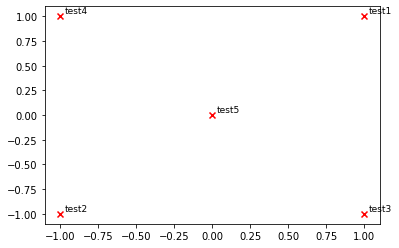

In [29]:
# Just run this cell.
def plot_embeddings(M_reduced, word2Ind, words):
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.show()

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

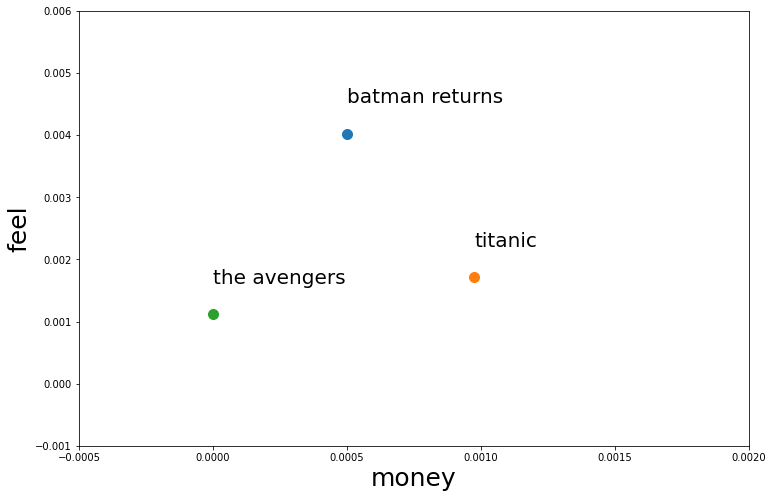

In [30]:
# Just run this cell.
def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    test_x = test_row[x_feature].item()
    test_y = test_row[y_feature].item()
    plt.scatter(test_x, test_y, s=100)
    plt.text(test_x, test_y+.0005, test_movie, fontsize=20)
    for movie in training_movies:
        row = row_for_title(movie)
        train_x = row[x_feature].item()
        train_y = row[y_feature].item()
        plt.scatter(train_x, train_y, s=100)
        plt.text(train_x, train_y+.0005, movie, fontsize=20)
    plt.show()
    
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["titanic", "the avengers"]
plot_with_two_features("batman returns", training, "money", "feel")

### Problem 2.2.a:

Compute the distance between the two action movies, *Batman Returns* and *The Avengers*, using the `money` and `feel` features only.  Assign it the name `action_distance`.

**Note:** If you have a row, you can use `item` to get a value from a column by its name.  For example, if `r` is a row, then `r["Genre"].item()` is the value in column `"Genre"` in row `r`.

*Hint*: Remember the function `row_for_title`, redefined for you below. 

In [31]:
def row_for_title(title):
    """Return the row for a title
    
    """
    return movies[movies["Title"]==title]

In [32]:
batman = row_for_title("batman returns") 
avengers = row_for_title("the avengers") 
def calc_distance(wordA, wordB, mov1, mov2):
  x_feature = wordA
  y_feature = wordB
  x_dist_sq = (mov1[x_feature].item() - mov2[x_feature].item())**2
  y_dist_sq = (mov1[y_feature].item() - mov2[y_feature].item())**2
  dist = (x_dist_sq + y_dist_sq) ** (0.5)
  return dist
action_distance = calc_distance('money', 'feel', batman, avengers)
action_distance

0.0029437356216700243

Below, we've added a third training movie, *The Terminator*. Before, the point closest to *Batman Returns* was *Titanic*, a romance movie. However, now the closest point is *The Terminator*, an action movie.

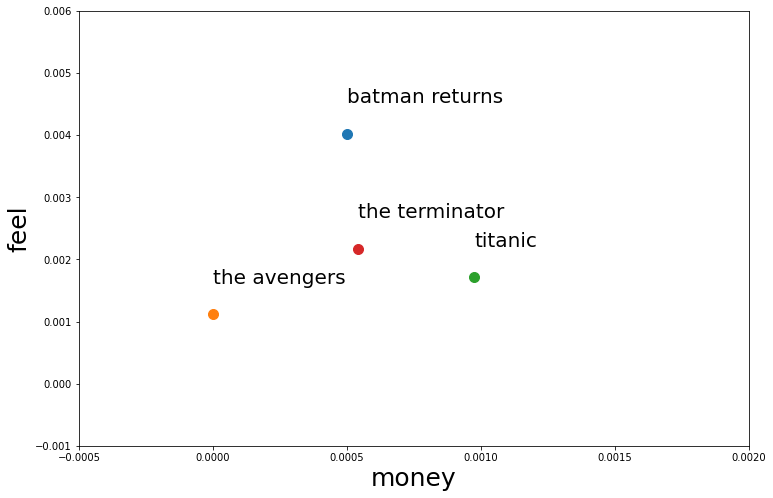

In [33]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["the avengers", "titanic", "the terminator"] 
plot_with_two_features("batman returns", training, "money", "feel") 

### Problem 2.2.b:

Complete the function `distance_two_features` that computes the Euclidean distance between any two movies, using two features. The last two lines call your function to show that *Batman Returns* is closer to *The Terminator* than *The Avengers*. 

In [34]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    x_dist_sq = (row1[x_feature].item() - row0[x_feature].item())**2
    y_dist_sq = (row1[y_feature].item() - row0[y_feature].item())**2
    dist = (x_dist_sq + y_dist_sq) ** (0.5)

    return dist

for movie in ["the terminator", "the avengers"]:
    movie_distance = distance_two_features(movie, "batman returns", "money", "feel")
    print(movie, 'distance:\t', movie_distance)

the terminator distance:	 0.0018531387547749904
the avengers distance:	 0.0029437356216700243


### Problem 2.2.c:

Define the function `distance_from_batman_returns` so that it works as described in its documentation.

**Note:** Your solution should not use arithmetic operations directly. Instead, it should make use of existing functionality above!

In [35]:
def distance_from_batman_returns(title):
    """The distance between the given movie and "batman returns", based on the features "money" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    dist_batmanret = distance_two_features(title, "batman returns", "money", "feel")
    return dist_batmanret

#for example, finding distance from "the terminator"
distance_from_batman_returns("the terminator")

0.0018531387547749904

### Problem 2.2.d:

Using the features `"money"` and `"feel"`, what are the names and genres of the 7 movies in the **training set** closest to "batman returns"?  To answer this question, make a table named `close_movies` containing those 7 movies with columns `"Title"`, `"Genre"`, `"money"`, and `"feel"`, as well as a column called `"distance from batman"` that contains the distance from "batman returns".  The dataframe should be **sorted in ascending order by `distance from batman`**.

*Hint*: You may find the function [`insert`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html) useful.

In [36]:
# The sample solution took multiple lines.
temp_movies_df = train_movies[["Title", "Genre", "money", "feel"]]
temp_movies_df['distance_from_batman'] = temp_movies_df.apply(lambda row: distance_from_batman_returns(row.Title), axis=1)
temp_movies_df = temp_movies_df.sort_values(by = 'distance_from_batman')
req_n_movies = 7
close_movies = temp_movies_df.iloc[np.arange(0, req_n_movies)]
close_movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Genre,money,feel,distance_from_batman
61,the bridges of madison county,romance,0.000565,0.004333,0.000323
199,the fisher king,romance,0.000618,0.003504,0.000525
81,broadcast news,romance,0.000137,0.003553,0.000590
24,hellboy,action,0.000000,0.003350,0.000834
120,as good as it gets,romance,0.000523,0.003139,0.000878
193,spider-man,action,0.000347,0.003126,0.000903
111,harold and maude,romance,0.000000,0.003023,0.001112


### Problem 2.2.e:

Next, we'll classify "batman returns" based on the genres of the closest movies. 

To do so, define the function `most_common` so that it works as described in its documentation below.

In [37]:
def most_common(label, dataframe):
    """The most common element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      dataframe: A dataframe.
     
    It returns the most common value in that column of that table.
    In case of a tie, it returns any one of the most common values
    """
    genre_list = dataframe[label].to_list()
    max_genre = max(genre_list, key = genre_list.count)
    return max_genre

# Calling most_common on your table of 7 nearest neighbors classifies
# "batman returns" as a romance movie, 5 votes to 2. 
most_common('Genre', close_movies)

'romance'

Congratulations, you've classified your first movie! However, we can see that the classifier doesn't work too well since it categorized *Batman Returns* as a romance movie. Let's see if we can do better!

### Part 3. Features

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two movies, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

### Problem 2.3.a:

Write a function to compute the Euclidean distance between two **arrays** of features of *arbitrary* (but equal) length.  Use it to compute the distance between the first movie in the training set and the first movie in the test set, *using all of the features*.  (Remember that the first six columns of your tables are not features.)

**Note:** To convert rows to arrays, use `np.array`. For example, if `df` was a dataframe, `np.array(df.iloc[i])` converts row i of `df` into an array.

In [38]:
def distance(features1, features2):
    """The Euclidean distance between two arrays of feature values."""
    n = np.min([len(features1), len(features2)])
    dist_sq = 0
    for i in range(n):
      dist_sq += (features1[i] - features2[i]) ** 2

    return dist_sq ** 0.5

train_mov1 = train_movies.iloc[0][6:1006].to_list()
test_mov1 = test_movies.iloc[0][6:1006].to_list()

distance_first_to_first = distance(train_mov1, test_mov1)
distance_first_to_first

0.04052576668373567

**Creating your own feature set**

Unfortunately, using all of the features has some downsides.  One clear downside is *computational* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So we're going to select just 20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or more broadly *feature engineering*.

### Problem 2.3.b:

In this question, we will help you get started on selecting more effective features for distinguishing romance from action movies. The plot below (generated for you) shows the average number of times each word occurs in a romance movie on the horizontal axis and the average number of times it occurs in an action movie on the vertical axis. 

![alt text](https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/word_plot.png "Title")

### Problem 2.3.c:

Using the plot above, choose 20 common words that you think might let you distinguish between romance and action movies. Make sure to choose words that are frequent enough that every movie contains at least one of them. Don't just choose the 20 most frequent, though... you can do much better.

You might want to come back to this question later to improve your list, once you've seen how to evaluate your classifier. 

In [39]:
# Set my_20_features to a list of 20 features (strings that are column labels)

my_20_features = ['run', 'world','job', 'play', 'idea', 'matter', 'room', 'school', 'war', 'mind', 'happi', 'shot', 'wife', 'head', 'turn', 'busi', 'move', 'knew', 'ship', 'mother']
print(len(my_20_features))
train_20 = train_movies[my_20_features]
test_20 = test_movies[my_20_features]
print(train_20)

20
          run     world       job  ...      knew      ship    mother
0    0.001082  0.000541  0.000541  ...  0.001082  0.000000  0.001622
1    0.000705  0.000705  0.001058  ...  0.000353  0.000000  0.000000
2    0.001186  0.000949  0.000474  ...  0.000000  0.002610  0.000000
3    0.000989  0.000330  0.000000  ...  0.000000  0.000000  0.000000
4    0.000521  0.000781  0.000000  ...  0.000781  0.000000  0.000260
..        ...       ...       ...  ...       ...       ...       ...
195  0.000306  0.000000  0.000000  ...  0.000306  0.003361  0.000000
196  0.001899  0.000633  0.001583  ...  0.000000  0.000000  0.000633
197  0.000824  0.000000  0.001647  ...  0.000549  0.000000  0.001098
198  0.001134  0.001701  0.001134  ...  0.000378  0.000000  0.000945
199  0.001031  0.000618  0.000824  ...  0.000412  0.000000  0.000412

[200 rows x 20 columns]


In two sentences or less, describe how you selected your features. 

*I tried to choose words which are present in both types of movies, but are not equally present in both kinds of movies. Graphically, I tried to select movies in the top quadrant, but not near the red curve*

Next, let's classify the first movie from our test set using these features.  You can examine the movie by running the cells below. Do you think it will be classified correctly?

In [40]:
print("Movie:")
print(test_movies.iloc[0,[0,1]])
print("Features:")
print(test_20.iloc[0])

Movie:
Title    the mummy
Genre       action
Name: 200, dtype: object
Features:
run       0.000000
world     0.000321
job       0.000321
play      0.000642
idea      0.000000
matter    0.000321
room      0.000642
school    0.000000
war       0.000000
mind      0.000000
happi     0.000000
shot      0.000321
wife      0.000000
head      0.000000
turn      0.000963
busi      0.000000
move      0.000000
knew      0.000000
ship      0.000000
mother    0.000963
Name: 200, dtype: float64


As before, we want to look for the movies in the training set that are most like our test movie.  We will calculate the Euclidean distances from the test movie (using the 20 selected features) to all movies in the training set.  You could do this with a `for` loop, but to make it computationally faster, we have provided a function, `fast_distances`, to do this for you.  Read its documentation to make sure you understand what it does.  (You don't need to understand the code in its body unless you want to.)

In [41]:
# Just run this cell to define fast_distances.

def fast_distances(test_row, train_dataframe):
    """An array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_20.iloc[0]).
      train_table: A table of features (for example, the whole
        table train_20)."""
    assert len(train_dataframe.columns) < 50, "Make sure you're not using all the features of the movies table."
    counts_matrix = np.asmatrix(train_20.values)
    diff = np.tile(test_row.values, [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

### Problem 2.3.d:

Use the `fast_distances` function provided above to compute the distance from the first movie in the test set to all the movies in the training set, **using your set of 20 features**.  Make a new dataframe called `genre_and_distances` with one row for each movie in the training set and three columns:
* The `"Title"` of the training movie
* The `"Genre"` of the training movie
* The `"Distance"` from the first movie in the test set 

Ensure that `genre_and_distances` is **sorted in increasing order by distance to the first test movie**.

*Hint*: You may find the function [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) useful.

In [42]:
testmov_first = test_20.iloc[0]
genre_and_distances = train_movies[['Title', 'Genre']]
genre_and_distances['Distance'] = fast_distances(testmov_first, train_20).tolist()
#genre_and_distances = fast_distances(testmov_first, train_20)
genre_and_distances = genre_and_distances.sort_values(by = 'Distance')
genre_and_distances

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Genre,Distance
104,sideways,romance,0.001604
150,life as a house,romance,0.001731
70,what women want,romance,0.001758
94,asylum,romance,0.001855
151,an american werewolf in paris,romance,0.001870
...,...,...,...
47,star trek v: the final frontier,action,0.006758
10,shakespeare in love,romance,0.007070
71,feast,action,0.007326
110,the jazz singer,romance,0.009011


### Problem 2.3.e:

Now compute the 5-nearest neighbors classification of the first movie in the test set.  That is, decide on its genre by finding the most common genre among its 5 nearest neighbors in the training set, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this movie right, and that's okay.)

In [43]:
# Set my_assigned_genre to the most common genre among these.
req_neighbours = 5
my_assigned_genre = most_common('Genre', genre_and_distances.iloc[0:req_neighbours])

# Set my_assigned_genre_was_correct to True if my_assigned_genre
# matches the actual genre of the first movie in the test set.
my_assigned_genre_was_correct = (my_assigned_genre == test_movies.iloc[0]['Genre'])

print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, " " if my_assigned_genre_was_correct else " not "))

The assigned genre, romance, was not correct.


**A classifier function**

Now we can write a single function that encapsulates the whole process of classification.

### Problem 2.3.f:

Write a function called `classify`.  It should take the following four arguments:
* A row of features for a movie to classify (e.g., `test_20.iloc[0]`).
* A table with a column for each feature (e.g., `train_20`).
* An array of classes that has as many items as the previous table has rows, and in the same order.
* `k`, the number of neighbors to use in classification.

It should return the class a `k`-nearest neighbor classifier picks for the given row of features (the string `'Romance'` or the string `'Action'`).

*Hint:* You may find [`Counter().most_common()`](https://docs.python.org/3/library/collections.html#collections.Counter) helpful for finding the classification result.

In [44]:
def classify(test_row, train_rows, train_labels, k):
    """Return the most common class among k nearest neigbors to test_row."""
    distances = fast_distances(test_row, train_rows)
    genre_and_distances = train_movies[['Title', 'Genre']]
    genre_and_distances['Distance'] = fast_distances(test_row, train_rows).tolist()
    #genre_and_distances = fast_distances(testmov_first, train_20)
    genre_and_distances = genre_and_distances.sort_values(by = 'Distance')
    my_assigned_genre = most_common('Genre', genre_and_distances.iloc[0:k])
    
    return my_assigned_genre

### Problem 2.3.g:

Assign `king_kong_genre` to the genre predicted by your classifier for the movie "king kong" in the test set, using **11 neighbors** and using your 20 features.

In [45]:
# The sample solution first defined a row called king_kong_features.
king_kong_features = test_movies[test_movies['Title'] == 'king kong'][my_20_features]
king_kong_genre = classify(king_kong_features, train_20, 1, 11)
king_kong_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'action'

Finally, when we evaluate our classifier, it will be useful to have a classification function that is specialized to use a fixed training set and a fixed value of `k`.

### Problem 2.3.h:

Create a classification function that takes as its argument a row containing your 20 features and classifies that row using the 11-nearest neighbors algorithm with `train_20` as its training set.

In [46]:
def classify_feature_row(row):
    assigned_genre = classify(row, train_20, 1, 11)

    return assigned_genre

# When you're done, this should produce 'Romance' or 'Action'.
classify_feature_row(test_20.iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'romance'

### Part 4: Evaluating your classifier

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set.

### Problem 2.4.a:

Use `classify_feature_row` and [`pandas.DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) (or a loop) to classify every movie in the test set.  Assign these guesses as an array to `test_guesses`.  **Then**, compute the proportion of correct classifications. 

In [47]:
#temp_df.iloc[0:20]
test_guesses = []
correct_counter = 0
boolean_val = []
for i in range(len(test_20)):
  assigned_genre = classify_feature_row(test_20.iloc[i])  
  actual_genre = test_movies.iloc[i]['Genre']
  test_guesses.append(assigned_genre)
  check_genre = (assigned_genre == actual_genre)
  boolean_val.append(check_genre)
  if check_genre:
    correct_counter += 1

proportion_correct = correct_counter/len(test_20)
proportion_correct

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.6388888888888888

### Problem 2.4.b:

An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_movie_correctness` to a dataframe with three columns, `'Title'`, `'Genre'`, and `'Was correct'`. The last column should contain `True` or `False` depending on whether or not the movie was classified correctly.

In [48]:
test_movie_correctness = test_movies[['Title', 'Genre']]
test_movie_correctness['Was correct'] = boolean_val
test_movie_correctness.sort_values('Was correct')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Genre,Was correct
200,the mummy,action,False
232,logan's run,action,False
231,legend,romance,False
225,rear window,romance,False
224,an officer and a gentleman,romance,False
221,dune,action,False
220,the negotiator,action,False
216,top gun,romance,False
213,blade ii,action,False
217,crime spree,action,False


### Problem 2.4.c:

Do you see a pattern in the mistakes that your classifier makes? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above. If you need some help, try looking up the movies that your classifier got wrong on Wikipedia.

*Write your answer here, replacing this text.*

At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.